In [1]:
import sys
sys.path.append("../granger-busca")
import numpy as np
from bisect import bisect
import scipy.stats as ss
import matplotlib.pyplot as plt
from gb import simulate, GrangerBusca
import fit_granger_k
from time import time

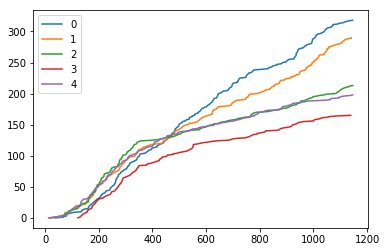

In [2]:
Alpha_t=np.array([
    [0.2,0.2,0.2,0.2,0.2],
    [0.2,0.2,0.2,0.2,0.2],
    [0.2,0.2,0.2,0.2,0.2],
    [0.2,0.2,0.2,0.2,0.2],
    [0.1,0.1,0.1,0.1,0.1]
])
Alpha2_t=np.array([
    [0.05,0.65,0.05,0.05,0.05],
    [0.65,0.05,0.05,0.05,0.05],
    [0.1,0.1,0.1,0.1,0.1],
    [0.1,0.1,0.1,0.1,0.1],
    [0.1,0.1,0.1,0.1,0.1]
])

d=len(Alpha_t)
beta=1.0
Beta_t=np.ones((d,d))*beta
mu_t = np.ones(d) *0.03
mu2_t=np.array([0.08,0.06,0.05,0.1,0.02])
mu2_t = np.ones(d) *0.02

T=1150
K=350
sim = simulate.GrangeBuscaSimulator(mu_t, Alpha_t,Alpha2_t,k=K,mu2_rates=mu2_t)
timestamps = sim.simulate(T)

counting = [np.arange(len(timestamps[i])) for i in range(len(timestamps))]
for i in range(len(timestamps)):
    plt.plot(timestamps[i], counting[i], label='%d' % i)
plt.legend()
plt.show()

#plt.imshow(Alpha_t)
#plt.show()

#plt.imshow(Alpha2_t)
#plt.show()

In [23]:
t=time()
G=G=fit_granger_k.Granger_k(timestamps,T=T)
G.fit(n_iter=350,var_k=10,var_mu=0.04,var_alpha=0.1,burn_in=200,initial_time=600)
print(time()-t)
G.print_rejection_rate()
#G.plot_values()

('Accepted', 590.00030095999)
('iteration', 0, 'time', 0.16795897483825684)
('Accepted', 592.90748673967096)
('iteration', 1, 'time', 0.1463940143585205)
('Accepted', 606.27206372115347)
('iteration', 2, 'time', 0.1498548984527588)
('iteration', 3, 'time', 0.14951634407043457)
('Accepted', 603.33745558487192)
('iteration', 4, 'time', 0.14516973495483398)
('Accepted', 592.9000919457643)
('iteration', 5, 'time', 0.14738917350769043)
('Accepted', 584.21461041672342)
('iteration', 6, 'time', 0.13616108894348145)
('Accepted', 600.09321191813888)
('iteration', 7, 'time', 0.13003301620483398)
('Accepted', 611.12379769722622)
('iteration', 8, 'time', 0.13874077796936035)
('Accepted', 615.98408619182192)
('iteration', 9, 'time', 0.13791990280151367)
('Accepted', 615.09832324384161)
('iteration', 10, 'time', 0.13746953010559082)
('Accepted', 610.70768352417804)
('iteration', 11, 'time', 0.15523004531860352)
('iteration', 12, 'time', 0.1349492073059082)
('iteration', 13, 'time', 0.137025117874145

('iteration', 133, 'time', 0.17287135124206543)
('Accepted', 474.53134045502219)
('iteration', 134, 'time', 0.17935872077941895)
('Accepted', 456.0293792035809)
('iteration', 135, 'time', 0.13674259185791016)
('Accepted', 445.56110757850558)
('iteration', 136, 'time', 0.16115975379943848)
('iteration', 137, 'time', 0.14031624794006348)
('Accepted', 437.09392409548212)
('iteration', 138, 'time', 0.13653159141540527)
('Accepted', 446.13683635457187)
('iteration', 139, 'time', 0.13695955276489258)
('iteration', 140, 'time', 0.13262271881103516)
('Accepted', 430.1501845669074)
('iteration', 141, 'time', 0.14286184310913086)
('Accepted', 430.55826476214395)
('iteration', 142, 'time', 0.13773369789123535)
('iteration', 143, 'time', 0.1272881031036377)
('Accepted', 425.66169759874327)
('iteration', 144, 'time', 0.12847042083740234)
('iteration', 145, 'time', 0.13323450088500977)
('iteration', 146, 'time', 0.12804245948791504)
('iteration', 147, 'time', 0.13463068008422852)
('Accepted', 431.84

('iteration', 257, 'time', 0.13035273551940918)
('iteration', 258, 'time', 0.13980817794799805)
('iteration', 259, 'time', 0.1478257179260254)
('Accepted', 428.9223633607707)
('iteration', 260, 'time', 0.14046096801757812)
('iteration', 261, 'time', 0.12865447998046875)
('Accepted', 427.55873314478981)
('iteration', 262, 'time', 0.13077521324157715)
('iteration', 263, 'time', 0.1309359073638916)
('Accepted', 433.28352692466945)
('iteration', 264, 'time', 0.13064217567443848)
('Accepted', 430.22168031102348)
('iteration', 265, 'time', 0.12353324890136719)
('Accepted', 429.83337103931336)
('iteration', 266, 'time', 0.1262209415435791)
('Accepted', 434.03731376181565)
('iteration', 267, 'time', 0.12732601165771484)
('Accepted', 434.76273602142948)
('iteration', 268, 'time', 0.13985896110534668)
('iteration', 269, 'time', 0.1329059600830078)
('iteration', 270, 'time', 0.15448236465454102)
('iteration', 271, 'time', 0.1398005485534668)
('iteration', 272, 'time', 0.13202881813049316)
('itera

In [11]:
def calc_delta(p1,p2,timestamps,t_idx):
    tp=timestamps[p1][t_idx]
    tpp_idx = bisect(timestamps[p2], tp)
    if tpp_idx == len(timestamps[p2]):
        tpp_idx -= 1
    tpp = timestamps[p2][tpp_idx]
    while tpp >= tp and tpp_idx > 0:
        tpp_idx -= 1
        tpp = timestamps[p2][tpp_idx]
    if tpp >= tp:
        return 0
    return tp - tpp


def P_k(k,d,T,Alpha1,Alpha2,Mu,timestamps):    
    if(k<0 or k>T):
        return float("-inf")
    
    p=0
    for p1 in range(d):
        k_idx=len(timestamps[p1]) -1 
        delta_ba=0
        past_term=[0]*d
        for t_idx in range(len(timestamps[p1])):
            first_term1=0
            second_term1=0
            first_term2=0
            second_term2=0
            
            if(timestamps[p1][t_idx]<=k):
                for p2 in range(d):
                    delta_ba=calc_delta(p1,p2,timestamps,t_idx)                
                    if(delta_ba>0):
                        first_term1+=Alpha1[p2][p1]/(1.+delta_ba)
                    
                    first_term2+=past_term[p2]*(timestamps[p1][t_idx]-timestamps[p1][t_idx-1])
                    
                    if(delta_ba>0):
                        past_term[p2]=Alpha1[p2][p1]/(1.+delta_ba)                    
                    else:
                        past_term[p2]=0.                
                        
                p+=np.log(Mu[p1]+first_term1)-first_term2
            else:
                for p2 in range(d):
                        
                    delta_ba=calc_delta(p1,p2,timestamps,t_idx)                
                    if(delta_ba>0):
                        second_term1+=Alpha2[p2][p1]/(1.+delta_ba)
                        
                    second_term2+=past_term[p2]*(timestamps[p1][t_idx]-timestamps[p1][t_idx-1])
                    
                    if(delta_ba>0):
                        past_term[p2]=Alpha2[p2][p1]/(1.+delta_ba)                    
                    else:
                        past_term[p2]=0.
                        
                p+=np.log(Mu[p1]+second_term1)-second_term2
        second_term2=0
        for p2 in range(d):
            if(t_idx>0):
                second_term2+=past_term[p2]*(T-timestamps[p1][t_idx])
    
        p-=second_term2
    return p


def P_mu(p1,k,d,T,Alpha1,Alpha2,Mu,timestamps):
    if(Mu[p1]<=0):
        return float("-inf")
    
    p=0    
    for t_idx in range(len(timestamps[p1])):
            first_term1=0
            second_term1=0
            
            if(timestamps[p1][t_idx]<=k):
                for p2 in range(d):
                    delta_ba=calc_delta(p1,p2,timestamps,t_idx)                
                    if(delta_ba>0):
                        first_term1+=Alpha1[p2][p1]/(1.+delta_ba)                   
                p+=np.log(Mu[p1]+first_term1)
            else:
                for p2 in range(d):                        
                    delta_ba=calc_delta(p1,p2,timestamps,t_idx)                
                    if(delta_ba>0):
                        second_term1+=Alpha2[p2][p1]/(1.+delta_ba)
                        
                p+=np.log(Mu[p1]+second_term1)
                
    p-=T*(Mu[p1])
    return p

def P_mu1(p1,k,d,T,Alpha1,Alpha2,Mu1,Mu2,timestamps):
    if(Mu1[p1]<=0):
        return float("-inf")
    
    p=0    
    for t_idx in range(len(timestamps[p1])):
            first_term1=0
            second_term1=0
            
            if(timestamps[p1][t_idx]<=k):
                for p2 in range(d):
                    delta_ba=calc_delta(p1,p2,timestamps,t_idx)                
                    if(delta_ba>0):
                        first_term1+=Alpha1[p2][p1]/(1.+delta_ba)                   
                p+=np.log(Mu1[p1]+first_term1)
                
    p-=k*(Mu1[p1])
    return p

def P_mu2(p1,k,d,T,Alpha1,Alpha2,Mu1,Mu2,timestamps):
    if(Mu2[p1]<=0):
        return float("-inf")
    
    p=0    
    for t_idx in range(len(timestamps[p1])):
            first_term1=0
            second_term1=0
            
            if(timestamps[p1][t_idx]>k):
                for p2 in range(d):                        
                    delta_ba=calc_delta(p1,p2,timestamps,t_idx)                
                    if(delta_ba>0):
                        second_term1+=Alpha2[p2][p1]/(1.+delta_ba)
                        
                p+=np.log(Mu2[p1]+second_term1)
                
    p-=(T-k)*(Mu2[p1])
    return p

def P_alpha1(p1,p2,k,d,T,Alpha1,Alpha2,Mu,timestamps):
    
    if(Alpha1[p2][p1]<0):
        return float("-inf")
    
    p=0
    k_idx=len(timestamps[p1]) -1 
    delta_ba=0
    past_term=[0]*d
    last_t_idx=0
    for t_idx in range(len(timestamps[p1])):
            first_term1=0
            first_term2=0
            if(timestamps[p1][t_idx]<=k):
                last_t_idx=t_idx
                for p2_i in range(d):
                    delta_ba=calc_delta(p1,p2_i,timestamps,t_idx)                
                    if(delta_ba>0):
                        first_term1+=Alpha1[p2_i][p1]/(1.+delta_ba)
                        #print(timestamps[p1][t_idx],p1,p2_i,Alpha1[p2_i][p1])
                    if(p2==p2_i):
                        first_term2+=past_term[p2_i]*(timestamps[p1][t_idx]-timestamps[p1][t_idx-1])
                    
                    if(delta_ba>0):
                        past_term[p2_i]=Alpha1[p2_i][p1]/(1.+delta_ba)                    
                    else:
                        past_term[p2_i]=0.  
                p+=np.log(Mu[p1]+first_term1)-first_term2
    
    first_term2=0
    
    if (last_t_idx==(len(timestamps[p1])-1)):
        final_t=T
    else:
        final_t=timestamps[p1][last_t_idx+1]
    delta_ba=calc_delta(p1,p2,timestamps,last_t_idx)       
    if(last_t_idx>0 and delta_ba>0):
        first_term2=Alpha1[p2][p1]/(1.+delta_ba)*(final_t-timestamps[p1][last_t_idx])
    p-=first_term2
    return p

def P_alpha2(p1,p2,k,d,T,Alpha1,Alpha2,Mu,timestamps):
    
    if(Alpha2[p2][p1]<0):
        return float("-inf")  
    p=0
    k_idx=len(timestamps[p1]) -1 
    delta_ba=0
    past_term=[0]*d
    for t_idx in range(len(timestamps[p1])):
            second_term1=0
            second_term2=0
            if(timestamps[p1][t_idx]>k):
                for p2_i in range(d):
                    delta_ba=calc_delta(p1,p2_i,timestamps,t_idx)                
                    if(delta_ba>0):
                        second_term1+=Alpha2[p2_i][p1]/(1.+delta_ba)
                    if(p2==p2_i):
                        second_term2+=past_term[p2_i]*(timestamps[p1][t_idx]-timestamps[p1][t_idx-1])
                    
                    if(delta_ba>0):
                        past_term[p2_i]=Alpha2[p2_i][p1]/(1.+delta_ba)   
                    else:
                        past_term[p2_i]=0.                                        
                        
                p+=np.log(Mu[p1]+second_term1)-second_term2
                    
    second_term2=0    

    if not (timestamps[p1][-1]<=k or timestamps[p1][-2]<=k):
        delta_ba=calc_delta(p1,p2,timestamps,t_idx)    
        if(t_idx>0 and delta_ba>0):
            second_term2=past_term[p2]*(T-timestamps[p1][t_idx])

    p-=second_term2
    return p
            


## Test k

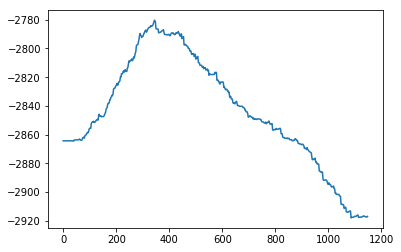

In [12]:
def P_k(k,d,T,Alpha1,Alpha2,Mu1,Mu2,timestamps):    
    if(k<0 or k>T):
        return float("-inf")
    
    p=0
    for p1 in range(d):
        k_idx=len(timestamps[p1]) -1 
        delta_ba=0
        past_term=[0]*d
        for t_idx in range(len(timestamps[p1])):
            first_term1=0
            second_term1=0
            first_term2=0
            second_term2=0
            
            if(timestamps[p1][t_idx]<=k):
                for p2 in range(d):
                    delta_ba=calc_delta(p1,p2,timestamps,t_idx)                
                    if(delta_ba>0):
                        first_term1+=Alpha1[p2][p1]/(1.+delta_ba)
                    
                    first_term2+=past_term[p2]*(timestamps[p1][t_idx]-timestamps[p1][t_idx-1])
                    
                    if(delta_ba>0):
                        past_term[p2]=Alpha1[p2][p1]/(1.+delta_ba)                    
                    else:
                        past_term[p2]=0.                
                        
                p+=np.log(Mu1[p1]+first_term1)-first_term2
            else:
                for p2 in range(d):
                        
                    delta_ba=calc_delta(p1,p2,timestamps,t_idx)                
                    if(delta_ba>0):
                        second_term1+=Alpha2[p2][p1]/(1.+delta_ba)
                        
                    second_term2+=past_term[p2]*(timestamps[p1][t_idx]-timestamps[p1][t_idx-1])
                    
                    if(delta_ba>0):
                        past_term[p2]=Alpha2[p2][p1]/(1.+delta_ba)                    
                    else:
                        past_term[p2]=0.
                        
                p+=np.log(Mu2[p1]+second_term1)-second_term2
        second_term2=0
        for p2 in range(d):
            if(t_idx>0):
                second_term2+=past_term[p2]*(T-timestamps[p1][t_idx])
    
        p-=second_term2
        p-=k*(Mu1[p1])+(T-k)*(Mu2[p1])
    return p



Alpha1=np.copy(Alpha_t)
Alpha2=np.copy(Alpha2_t)
Mu1=np.copy(mu_t)
Mu2=mu_t

'''
k_v=[T/2]
d=len(timestamps)
past_p_k=P_k(k_v[-1],d,T,Alpha1,Alpha2,Mu1,Mu2,timestamps)
for i in range(400):
    new_k=ss.norm.rvs(k_v[-1],15)
    new_p_k=P_k(new_k,d,T,Alpha1,Alpha2,Mu1,Mu2,timestamps)
    r=np.exp(new_p_k - past_p_k)
    if(r>1 or ss.uniform.rvs()<r):
        #print("Accepted",k_v[-1],new_k,np.exp(past_p_k - new_p_k),past_p_k,new_p_k,past_p_k-new_p_k)
        k_v.append(new_k)
        past_p_k=new_p_k
    
k_v=k_v[:]
print(len(k_v))
plt.plot(range(len(k_v)),k_v)
plt.show()

print(sum(k_v)/len(k_v))'''
l=[i*2 for i in range(0,int(T/2))]
p=[P_k(i,d,T,Alpha1,Alpha2,Mu1,Mu2,timestamps) for i in l]
plt.plot(l,p)
plt.show()



## Test Mu

In [ ]:
Alpha1=np.copy(Alpha_t)
Alpha2=np.copy(Alpha2_t)
Mu=np.copy(mu_t)
k=K

k_v=[T/2]
d=len(timestamps)
initial_value=1.0/d
Mu_v=[np.ones(shape=(d))*initial_value]
n_iter=400
for i in range(n_iter):
    new_Mu=np.copy(Mu_v[-1])
    for p1 in range(d):
        past_p_Mu=P_mu(p1,k,d,T,Alpha1,Alpha2,new_Mu,timestamps)
        new_Mu[p1]=ss.norm.rvs(Mu_v[-1][p1],scale=0.15)      
        new_p_Mu=P_mu(p1,k,d,T,Alpha1,Alpha2,new_Mu,timestamps)
        r=np.exp(new_p_Mu-past_p_Mu)
        if(r>1 or ss.uniform.rvs()<r):
            pass
            #past_p_Mu[p1]=new_p_Mu                        
        else:
            new_Mu[p1]=Mu_v[-1][p1]  

    Mu_v.append(new_Mu)


Mu_lista=[[] for i in range(2)]
burn_in=100
for i in range(d):
    for i_iter in range(burn_in,n_iter):
        Mu_lista[i].append(Mu_v[i_iter][i])
    
    
print(len(Mu_lista[0])) 
for i in range(d):
    plt.plot(range(len(Mu_lista[i])),Mu_lista[i])
plt.show()    
    
l=[i/100. for i in range(1,100)]
for i in range(d):
    Mu=np.copy(mu_t)
    p=[]
    for j in range(1,100):
        Mu[i]=j/100.
        p.append(P_mu(i,k,d,T,Alpha1,Alpha2,Mu,timestamps))
    plt.plot(l,p,label='%d' % i)
plt.legend()
plt.show()

for p1 in range(d):
    print("mu",p1,np.mean(Mu_lista[p1]))


## Test Mu1

300


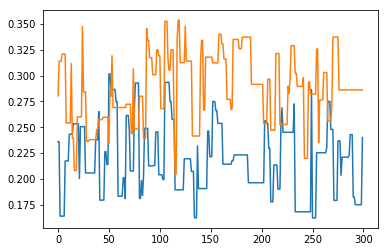

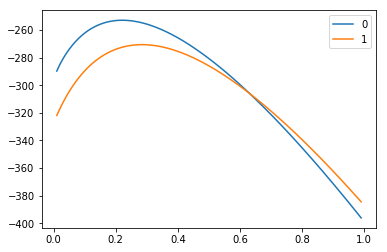

mu 0 0.219218439825
mu 1 0.2871161599


In [18]:
Alpha1=np.copy(Alpha_t)
Alpha2=np.copy(Alpha2_t)
Mu=np.copy(mu_t)
Mu2=np.copy(mu2_t)
k=K

k_v=[T/2]
d=len(timestamps)
initial_value=1.0/d
Mu1_v=[np.ones(shape=(d))*initial_value]
n_iter=400
for i in range(n_iter):
    new_Mu1=np.copy(Mu1_v[-1])
    for p1 in range(d):
        past_p_Mu1=P_mu1(p1,k,d,T,Alpha1,Alpha2,new_Mu1,Mu2,timestamps)
        new_Mu1[p1]=ss.norm.rvs(Mu1_v[-1][p1],scale=0.15)      
        new_p_Mu1=P_mu1(p1,k,d,T,Alpha1,Alpha2,new_Mu1,Mu2,timestamps)
        r=np.exp(new_p_Mu1-past_p_Mu1)
        if(r>1 or ss.uniform.rvs()<r):
            pass
            #past_p_Mu[p1]=new_p_Mu                        
        else:
            new_Mu1[p1]=Mu1_v[-1][p1]  

    Mu1_v.append(new_Mu1)


Mu_lista=[[] for i in range(2)]
burn_in=100
for i in range(d):
    for i_iter in range(burn_in,n_iter):
        Mu_lista[i].append(Mu1_v[i_iter][i])
    
    
print(len(Mu_lista[0])) 
for i in range(d):
    plt.plot(range(len(Mu_lista[i])),Mu_lista[i])
plt.show()    
    
l=[i/100. for i in range(1,100)]
for i in range(d):
    Mu=np.copy(mu_t)
    p=[]
    for j in range(1,100):
        Mu[i]=j/100.
        p.append(P_mu1(i,k,d,T,Alpha1,Alpha2,Mu,Mu2,timestamps))
    plt.plot(l,p,label='%d' % i)
plt.legend()
plt.show()

for p1 in range(d):
    print("mu",p1,np.mean(Mu_lista[p1]))


## Test Mu2

300


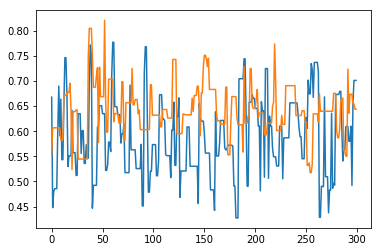

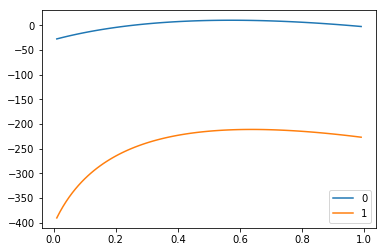

mu 0 0.589063704951
mu 1 0.64095824113


In [34]:
Alpha1=np.copy(Alpha_t)
Alpha2=np.copy(Alpha2_t)
Mu1=np.copy(mu_t)
k=K

k_v=[T/2]
d=len(timestamps)
initial_value=1.0/d
Mu2_v=[np.ones(shape=(d))*initial_value]
n_iter=400
for i in range(n_iter):
    new_Mu2=np.copy(Mu2_v[-1])
    for p1 in range(d):
        past_p_Mu2=P_mu2(p1,k,d,T,Alpha1,Alpha2,Mu1,new_Mu2,timestamps)
        new_Mu2[p1]=ss.norm.rvs(Mu2_v[-1][p1],scale=0.15)      
        new_p_Mu2=P_mu2(p1,k,d,T,Alpha1,Alpha2,Mu1,new_Mu2,timestamps)
        r=np.exp(new_p_Mu2-past_p_Mu2)
        if(r>1 or ss.uniform.rvs()<r):
            pass
            #past_p_Mu[p1]=new_p_Mu                        
        else:
            new_Mu2[p1]=Mu2_v[-1][p1]  

    Mu2_v.append(new_Mu2)


Mu_lista=[[] for i in range(2)]
burn_in=100
for i in range(d):
    for i_iter in range(burn_in,n_iter):
        Mu_lista[i].append(Mu2_v[i_iter][i])
    
    
print(len(Mu_lista[0])) 
for i in range(d):
    plt.plot(range(len(Mu_lista[i])),Mu_lista[i])
plt.show()    
    
l=[i/100. for i in range(1,100)]
for i in range(d):
    Mu=np.copy(mu_t)
    p=[]
    for j in range(1,100):
        Mu[i]=j/100.
        p.append(P_mu2(i,k,d,T,Alpha1,Alpha2,Mu1,Mu,timestamps))
    plt.plot(l,p,label='%d' % i)
plt.legend()
plt.show()

for p1 in range(d):
    print("mu",p1,np.mean(Mu_lista[p1]))


## Test Alpha1

In [ ]:
Alpha1=np.copy(Alpha_t)
Alpha2=np.copy(Alpha2_t)
Mu=np.copy(mu_t)
k=K

d=len(timestamps)
initial_value=1.0/d
Alpha1_v=[np.ones(shape=(d,d))*initial_value]

n_iter=400
for i in range(n_iter):
    new_Alpha1=np.copy(Alpha1_v[-1])
    for p1 in range(d):
        for p2 in range(d):
            past_p_Alpha1=P_alpha1(p1,p2,k,d,T,new_Alpha1,Alpha2,Mu,timestamps)
            new_Alpha1[p2][p1]=ss.norm.rvs(Alpha1_v[-1][p2][p1],scale=0.05)
            new_p_Alpha1=P_alpha1(p1,p2,k,d,T,new_Alpha1,Alpha2,Mu,timestamps)
            r=np.exp(new_p_Alpha1 - past_p_Alpha1)
            if(r>1 or ss.uniform.rvs()<r):
                #past_p_Alpha1[p1][p2]=new_p_Alpha1 
                pass
            else:
                new_Alpha1[p2][p1]=Alpha1_v[-1][p2][p1]
    Alpha1_v.append(new_Alpha1)
    
    
Alpha1_lista=[]
for i in range(d):
    Alpha1_lista.append([[] for i in range(d)])
    
burn_in=100
for i in range(d):
    for j in range(d):
        for i_iter in range(burn_in,n_iter):
            Alpha1_lista[i][j].append(Alpha1_v[i_iter][i][j])


for i in range(d):
    for j in range(d):
        plt.plot(range(len(Alpha1_lista[i][j])),Alpha1_lista[j][i],label='%d %d' % (j,i))
        
    plt.legend()
    plt.show()    

l=[i/100. for i in range(1,100)]
p=[]
for i in range(d):
    p.append([])
    for j in range(d):
        p[i].append([])
        Alpha1=np.copy(Alpha_t)
        for v in range(1,100):
            Alpha1[j][i]=v/100.
            p[i][j].append(P_alpha1(i,j,k,d,T,Alpha1,Alpha2,Mu,timestamps))
    
        plt.plot(l,p[i][j],label='%d %d' % (j,i))
plt.legend()
plt.show()

for p1 in range(d):
    for p2 in range(d):
        print("Alpha1",p1,p2,np.mean(Alpha1_lista[p1][p2]))


## Test Alpha2

In [ ]:
Alpha1=np.copy(Alpha_t)
Alpha2=np.copy(Alpha2_t)
Mu=np.copy(mu_t)
k=K

k_v=[T/2]
d=len(timestamps)
initial_value=1.0/d
Alpha2_v=[np.ones(shape=(d,d))*initial_value]

n_iter=450
for i in range(n_iter):
    new_Alpha2=np.copy(Alpha2_v[-1])
    for p1 in range(d):
        for p2 in range(d):
            past_p_Alpha2=P_alpha2(p1,p2,k,d,T,Alpha1,new_Alpha2,Mu,timestamps)
            new_Alpha2[p2][p1]=ss.norm.rvs(Alpha2_v[-1][p2][p1],scale=0.05)
            new_p_Alpha2=P_alpha2(p1,p2,k,d,T,Alpha1,new_Alpha2,Mu,timestamps)
            r=np.exp(new_p_Alpha2 - past_p_Alpha2)
            if(r>1 or ss.uniform.rvs()<r):
                #past_p_Alpha2[p1][p2]=new_p_Alpha2 
                pass
            else:
                new_Alpha2[p2][p1]=Alpha2_v[-1][p2][p1]
                
    Alpha2_v.append(new_Alpha2)
    
    
Alpha2_lista=[]
for i in range(d):
    Alpha2_lista.append([[] for i in range(2)])
    
burn_in=150
for i in range(d):
    for j in range(d):
        for i_iter in range(burn_in,n_iter):
            Alpha2_lista[i][j].append(Alpha2_v[i_iter][i][j])


for i in range(d):
    for j in range(d):
        plt.plot(range(len(Alpha2_lista[i][j])),Alpha2_lista[j][i],label='%d %d' % (j,i))
        
    plt.legend()
    plt.show()    


l=[i/100. for i in range(1,200)]
p=[]
for i in range(d):
    p.append([])
    for j in range(d):
        p[i].append([])
        Alpha2=np.copy(Alpha2_t)
        for v in range(1,200):
            Alpha2[j][i]=v/100.
            p[i][j].append(P_alpha2(i,j,k,d,T,Alpha1,Alpha2,Mu,timestamps))
    
        plt.plot(l,p[i][j],label='%d %d' % (j,i))
plt.legend()
plt.show()

for p1 in range(d):
    for p2 in range(d):
        print("Alpha2",p1,p2,np.mean(Alpha2_lista[p1][p2]))

## Everything

In [ ]:
d=len(timestamps)
initial_value=1.0/d
initial_time=T/2.
k_v=[initial_time]
Mu_v=[np.ones(shape=(d))*initial_value]
Alpha1_v=[np.ones(shape=(d,d))*initial_value]
Alpha2_v=[np.ones(shape=(d,d))*initial_value]

k=k_v[0]
Mu=Mu_v[0]
Alpha1=Alpha1_v[0]
Alpha2=Alpha2_v[0]

var_k=15
var_mu=0.03
var_alpha=0.08

reject_k=0.
reject_mu=[0.]*d
reject_alpha1=[[0.]*d for i in range(d)]
reject_alpha2=[[0.]*d for i in range(d)]

n_iter=400
for i in range(n_iter):
    ######## k ########
    past_p_k=P_k(k_v[-1],d,T,Alpha1_v[-1],Alpha2_v[-1],Mu_v[-1],timestamps)
    new_k=ss.norm.rvs(k_v[-1],var_k)
    new_p_k=P_k(new_k,d,T,Alpha1_v[-1],Alpha2_v[-1],Mu_v[-1],timestamps)
    r=np.exp(new_p_k - past_p_k)
    if(r>1 or ss.uniform.rvs()<r):
        k_v.append(new_k)
        #past_p_k=new_p
    else:
        k_v.append(k_v[-1])
        reject_k+=1
    
    k=k_v[-1]
    ########  ########
    new_Mu=np.copy(Mu_v[-1])
    new_Alpha1=np.copy(Alpha1_v[-1])
    new_Alpha2=np.copy(Alpha2_v[-1])
    for p1 in range(d):
        ######## Mu ########
        past_p_Mu=P_mu(p1,k,d,T,Alpha1_v[-1],Alpha2_v[-1],new_Mu,timestamps)
        new_Mu[p1]=ss.norm.rvs(Mu_v[-1][p1],scale=var_mu)
        new_p_Mu=P_mu(p1,k,d,T,Alpha1_v[-1],Alpha2_v[-1],new_Mu,timestamps)
        r=np.exp(new_p_Mu-past_p_Mu)
        if(r>1 or ss.uniform.rvs()<r):
            #past_p_Mu[p1]=new_p_Mu
            pass
        else:
            new_Mu[p1]=Mu_v[-1][p1]
            reject_mu[p1]+=1
        ##########  ########
        
        for p2 in range(d):
            ##### Alpha1 #####
            past_p_Alpha1=P_alpha1(p1,p2,k,d,T,new_Alpha1,new_Alpha2,new_Mu,timestamps)
            new_Alpha1[p2][p1]=ss.norm.rvs(Alpha1_v[-1][p2][p1],scale=var_alpha)
            new_p_Alpha1=P_alpha1(p1,p2,k,d,T,new_Alpha1,new_Alpha2,new_Mu,timestamps)
            r=np.exp(new_p_Alpha1- past_p_Alpha1)     
            if(r>1 or ss.uniform.rvs()<r):
                #past_p_Alpha1[p1][p2]=new_p_Alpha1  
                pass
            else:
                new_Alpha1[p2][p1]=Alpha1_v[-1][p2][p1]
                reject_alpha1[p2][p1]+=1
                
            ##### Alpha2 #####
            past_p_Alpha2=P_alpha2(p1,p2,k,d,T,new_Alpha1,new_Alpha2,new_Mu,timestamps)
            new_Alpha2[p2][p1]=ss.norm.rvs(Alpha2_v[-1][p2][p1],scale=var_alpha)
            new_p_Alpha2=P_alpha2(p1,p2,k,d,T,new_Alpha1,new_Alpha2,new_Mu,timestamps)
        
            r=np.exp(new_p_Alpha2- past_p_Alpha2)
            if(r>1 or ss.uniform.rvs()<r):
                #past_p_Alpha2[p1][p2]=new_p_Alpha2
                pass
            else:
                new_Alpha2[p2][p1]=Alpha2_v[-1][p2][p1]
                reject_alpha2[p2][p1]+=1
    
    Mu_v.append(new_Mu)
    Alpha1_v.append(new_Alpha1)
    Alpha2_v.append(new_Alpha2)
    
    
burn_in=150
k_v=k_v[burn_in:]
Mu_v=Mu_v[burn_in:]
Alpha1_v=Alpha1_v[burn_in:]
Alpha2_v=Alpha2_v[burn_in:]

print("k",np.mean(k_v))
for p1 in range(d):
    print("mu",p1,np.mean([Mu_v[i][p1] for i in range(n_iter-burn_in)]))
for p1 in range(d):
    for p2 in range(d):
        print("Alpha1",p1,p2,np.mean([Alpha1_v[i][p1][p2] for i in range(n_iter-burn_in)]))
for p1 in range(d):
    for p2 in range(d):
        print("Alpha2",p1,p2,np.mean([Alpha2_v[i][p1][p2] for i in range(n_iter-burn_in)]))
        
        
print(reject_k/n_iter)
print([i/n_iter for i in reject_mu])
print([[i/n_iter for i in j] for j in reject_alpha1])
print([[i/n_iter for i in j] for j in reject_alpha2])

## Everything (Mu divided)

In [4]:
deltas={}
def calc_delta(p1,p2,timestamps,t_idx):
    
    str_delta = str(p1)+'_'+str(p2)+'_'+str(t_idx)
    if (str_delta in deltas):
        return deltas[str_delta]
    
    tp=timestamps[p1][t_idx]
    tpp_idx = bisect(timestamps[p2], tp)
    if tpp_idx == len(timestamps[p2]):
        tpp_idx -= 1
    tpp = timestamps[p2][tpp_idx]
    while tpp >= tp and tpp_idx > 0:
        tpp_idx -= 1
        tpp = timestamps[p2][tpp_idx]
    if tpp >= tp:
        return 0
    deltas[str_delta]=(tp-tpp)
    return tp - tpp


def P_k(k,d,T,Alpha1,Alpha2,Mu1,Mu2,timestamps):    
    if(k<0 or k>T):
        return float("-inf")
    
    p=0
    for p1 in range(d):
        k_idx=len(timestamps[p1]) -1 
        delta_ba=0
        past_term=[0]*d
        for t_idx in range(len(timestamps[p1])):
            first_term1=0
            second_term1=0
            first_term2=0
            second_term2=0
            
            if(timestamps[p1][t_idx]<=k):
                for p2 in range(d):
                    delta_ba=calc_delta(p1,p2,timestamps,t_idx)                
                    if(delta_ba>0):
                        first_term1+=Alpha1[p2][p1]/(1.+delta_ba)
                    
                    first_term2+=past_term[p2]*(timestamps[p1][t_idx]-timestamps[p1][t_idx-1])
                    
                    if(delta_ba>0):
                        past_term[p2]=Alpha1[p2][p1]/(1.+delta_ba)                    
                    else:
                        past_term[p2]=0.                
                        
                p+=np.log(Mu1[p1]+first_term1)-first_term2
            else:
                for p2 in range(d):
                        
                    delta_ba=calc_delta(p1,p2,timestamps,t_idx)                
                    if(delta_ba>0):
                        second_term1+=Alpha2[p2][p1]/(1.+delta_ba)
                        
                    second_term2+=past_term[p2]*(timestamps[p1][t_idx]-timestamps[p1][t_idx-1])
                    
                    if(delta_ba>0):
                        past_term[p2]=Alpha2[p2][p1]/(1.+delta_ba)                    
                    else:
                        past_term[p2]=0.
                        
                p+=np.log(Mu2[p1]+second_term1)-second_term2
        second_term2=0
        for p2 in range(d):
            if(t_idx>0):
                second_term2+=past_term[p2]*(T-timestamps[p1][t_idx])
    
        p-=second_term2
        p-=k*(Mu1[p1])+(T-k)*(Mu2[p1])
    return p


def P_mu1(p1,k,d,T,Alpha1,Alpha2,Mu1,Mu2,timestamps):
    if(Mu1[p1]<=0):
        return float("-inf")
    
    p=0    
    for t_idx in range(len(timestamps[p1])):
            first_term1=0
            second_term1=0
            
            if(timestamps[p1][t_idx]<=k):
                for p2 in range(d):
                    delta_ba=calc_delta(p1,p2,timestamps,t_idx)                
                    if(delta_ba>0):
                        first_term1+=Alpha1[p2][p1]/(1.+delta_ba)                   
                p+=np.log(Mu1[p1]+first_term1)
                
    p-=k*(Mu1[p1])
    return p

def P_mu2(p1,k,d,T,Alpha1,Alpha2,Mu1,Mu2,timestamps):
    if(Mu2[p1]<=0):
        return float("-inf")
    
    p=0    
    for t_idx in range(len(timestamps[p1])):
            first_term1=0
            second_term1=0
            
            if(timestamps[p1][t_idx]>k):
                for p2 in range(d):                        
                    delta_ba=calc_delta(p1,p2,timestamps,t_idx)                
                    if(delta_ba>0):
                        second_term1+=Alpha2[p2][p1]/(1.+delta_ba)
                        
                p+=np.log(Mu2[p1]+second_term1)
                
    p-=(T-k)*(Mu2[p1])
    return p

def P_alpha1(p1,p2,k,d,T,Alpha1,Alpha2,Mu1,Mu2,timestamps):
    
    if(Alpha1[p2][p1]<0):
        return float("-inf")
    
    p=0
    k_idx=len(timestamps[p1]) -1 
    delta_ba=0
    past_term=[0]*d
    last_t_idx=0
    for t_idx in range(len(timestamps[p1])):
            first_term1=0
            first_term2=0
            if(timestamps[p1][t_idx]<=k):
                last_t_idx=t_idx
                for p2_i in range(d):
                    delta_ba=calc_delta(p1,p2_i,timestamps,t_idx)                
                    if(delta_ba>0):
                        first_term1+=Alpha1[p2_i][p1]/(1.+delta_ba)
                        #print(timestamps[p1][t_idx],p1,p2_i,Alpha1[p2_i][p1])
                    if(p2==p2_i):
                        first_term2+=past_term[p2_i]*(timestamps[p1][t_idx]-timestamps[p1][t_idx-1])
                    
                    if(delta_ba>0):
                        past_term[p2_i]=Alpha1[p2_i][p1]/(1.+delta_ba)                    
                    else:
                        past_term[p2_i]=0.  
                p+=np.log(Mu1[p1]+first_term1)-first_term2
    
    first_term2=0
    
    if (last_t_idx==(len(timestamps[p1])-1)):
        final_t=T
    else:
        final_t=timestamps[p1][last_t_idx+1]
    delta_ba=calc_delta(p1,p2,timestamps,last_t_idx)       
    if(last_t_idx>0 and delta_ba>0):
        first_term2=Alpha1[p2][p1]/(1.+delta_ba)*(final_t-timestamps[p1][last_t_idx])
    p-=first_term2
    return p

def P_alpha2(p1,p2,k,d,T,Alpha1,Alpha2,Mu1,Mu2,timestamps):
    
    if(Alpha2[p2][p1]<0):
        return float("-inf")  
    p=0
    k_idx=len(timestamps[p1]) -1 
    delta_ba=0
    past_term=[0]*d
    for t_idx in range(len(timestamps[p1])):
            second_term1=0
            second_term2=0
            if(timestamps[p1][t_idx]>k):
                for p2_i in range(d):
                    delta_ba=calc_delta(p1,p2_i,timestamps,t_idx)                
                    if(delta_ba>0):
                        second_term1+=Alpha2[p2_i][p1]/(1.+delta_ba)
                    if(p2==p2_i):
                        second_term2+=past_term[p2_i]*(timestamps[p1][t_idx]-timestamps[p1][t_idx-1])
                    
                    if(delta_ba>0):
                        past_term[p2_i]=Alpha2[p2_i][p1]/(1.+delta_ba)   
                    else:
                        past_term[p2_i]=0.                                        
                        
                p+=np.log(Mu2[p1]+second_term1)-second_term2
                    
    second_term2=0    

    if not (timestamps[p1][-1]<=k or timestamps[p1][-2]<=k):
        delta_ba=calc_delta(p1,p2,timestamps,t_idx)    
        if(t_idx>0 and delta_ba>0):
            second_term2=past_term[p2]*(T-timestamps[p1][t_idx])

    p-=second_term2
    return p
            


In [35]:
deltas={}
t=time()
d=len(timestamps)
initial_value=1.0/d
initial_time=T/2.
k_v=[initial_time]
Mu1_v=[np.ones(shape=(d))*initial_value]
Mu2_v=[np.ones(shape=(d))*initial_value]
Alpha1_v=[np.ones(shape=(d,d))*initial_value]
Alpha2_v=[np.ones(shape=(d,d))*initial_value]

k=k_v[0]
Mu1=Mu2_v[0]
Mu1=Mu2_v[0]
Alpha1=Alpha1_v[0]
Alpha2=Alpha2_v[0]

var_k=5
var_mu=0.03
var_alpha=0.08

reject_k=0.
reject_mu1=[0.]*d
reject_mu2=[0.]*d
reject_alpha1=[[0.]*d for i in range(d)]
reject_alpha2=[[0.]*d for i in range(d)]

n_iter=500
for i in range(n_iter):
    ######## k ########
    past_p_k=P_k(k_v[-1],d,T,Alpha1_v[-1],Alpha2_v[-1],Mu1_v[-1],Mu2_v[-1],timestamps)
    new_k=ss.norm.rvs(k_v[-1],var_k)
    new_p_k=P_k(new_k,d,T,Alpha1_v[-1],Alpha2_v[-1],Mu1_v[-1],Mu2_v[-1],timestamps)
    r=np.exp(new_p_k - past_p_k)
    if(r>1 or ss.uniform.rvs()<r):
        k_v.append(new_k)
        #past_p_k=new_p
    else:
        k_v.append(k_v[-1])
        reject_k+=1
    
    k=k_v[-1]
    ########  ########
    new_Mu1=np.copy(Mu1_v[-1])
    new_Mu2=np.copy(Mu2_v[-1])
    new_Alpha1=np.copy(Alpha1_v[-1])
    new_Alpha2=np.copy(Alpha2_v[-1])
    for p1 in range(d):
        ######## Mu1 ########
        past_p_Mu1=P_mu1(p1,k,d,T,Alpha1_v[-1],Alpha2_v[-1],new_Mu1,new_Mu2,timestamps)
        new_Mu1[p1]=ss.norm.rvs(Mu1_v[-1][p1],scale=var_mu)
        new_p_Mu1=P_mu1(p1,k,d,T,Alpha1_v[-1],Alpha2_v[-1],new_Mu1,new_Mu2,timestamps)
        r=np.exp(new_p_Mu1-past_p_Mu1)
        if(r>1 or ss.uniform.rvs()<r):
            #past_p_Mu[p1]=new_p_Mu
            pass
        else:
            new_Mu1[p1]=Mu1_v[-1][p1]
            reject_mu1[p1]+=1
        ##########  ########
        
        ######## Mu2 ########
        past_p_Mu2=P_mu2(p1,k,d,T,Alpha1_v[-1],Alpha2_v[-1],new_Mu1,new_Mu2,timestamps)
        new_Mu2[p1]=ss.norm.rvs(Mu2_v[-1][p1],scale=var_mu)
        new_p_Mu2=P_mu2(p1,k,d,T,Alpha1_v[-1],Alpha2_v[-1],new_Mu1,new_Mu2,timestamps)
        r=np.exp(new_p_Mu2-past_p_Mu2)
        if(r>1 or ss.uniform.rvs()<r):
            #past_p_Mu[p1]=new_p_Mu
            pass
        else:
            new_Mu2[p1]=Mu2_v[-1][p1]
            reject_mu2[p1]+=1
        ##########  ########
        
        for p2 in range(d):
            ##### Alpha1 #####
            past_p_Alpha1=P_alpha1(p1,p2,k,d,T,new_Alpha1,new_Alpha2,new_Mu1,new_Mu2,timestamps)
            new_Alpha1[p2][p1]=ss.norm.rvs(Alpha1_v[-1][p2][p1],scale=var_alpha)
            new_p_Alpha1=P_alpha1(p1,p2,k,d,T,new_Alpha1,new_Alpha2,new_Mu1,new_Mu2,timestamps)
            r=np.exp(new_p_Alpha1- past_p_Alpha1)     
            if(r>1 or ss.uniform.rvs()<r):
                #past_p_Alpha1[p1][p2]=new_p_Alpha1  
                pass
            else:
                new_Alpha1[p2][p1]=Alpha1_v[-1][p2][p1]
                reject_alpha1[p2][p1]+=1
                
            ##### Alpha2 #####
            past_p_Alpha2=P_alpha2(p1,p2,k,d,T,new_Alpha1,new_Alpha2,new_Mu1,new_Mu2,timestamps)
            new_Alpha2[p2][p1]=ss.norm.rvs(Alpha2_v[-1][p2][p1],scale=var_alpha)
            new_p_Alpha2=P_alpha2(p1,p2,k,d,T,new_Alpha1,new_Alpha2,new_Mu1,new_Mu2,timestamps)
        
            r=np.exp(new_p_Alpha2- past_p_Alpha2)
            if(r>1 or ss.uniform.rvs()<r):
                #past_p_Alpha2[p1][p2]=new_p_Alpha2
                pass
            else:
                new_Alpha2[p2][p1]=Alpha2_v[-1][p2][p1]
                reject_alpha2[p2][p1]+=1
    
    Mu1_v.append(new_Mu1)
    Mu2_v.append(new_Mu2)
    Alpha1_v.append(new_Alpha1)
    Alpha2_v.append(new_Alpha2)
    
    
burn_in=150
k_v=k_v[burn_in:]
Mu1_v=Mu1_v[burn_in:]
Mu2_v=Mu2_v[burn_in:]
Alpha1_v=Alpha1_v[burn_in:]
Alpha2_v=Alpha2_v[burn_in:]

print("k",np.mean(k_v))
for p1 in range(d):
    print("mu1",p1,np.mean([Mu1_v[i][p1] for i in range(n_iter-burn_in)]))
for p1 in range(d):
    print("mu2",p1,np.mean([Mu2_v[i][p1] for i in range(n_iter-burn_in)]))
for p1 in range(d):
    for p2 in range(d):
        print("Alpha1",p1,p2,np.mean([Alpha1_v[i][p1][p2] for i in range(n_iter-burn_in)]))
for p1 in range(d):
    for p2 in range(d):
        print("Alpha2",p1,p2,np.mean([Alpha2_v[i][p1][p2] for i in range(n_iter-burn_in)]))
        
print(time()-t)       
print(reject_k/n_iter)
print([i/n_iter for i in reject_mu])
print([[i/n_iter for i in j] for j in reject_alpha1])
print([[i/n_iter for i in j] for j in reject_alpha2])

k 530.334748929
mu1 0 0.0502919957759
mu1 1 0.0260654437316
mu1 2 0.0487684366115
mu1 3 0.0370594664361
mu2 0 0.031619728344
mu2 1 0.0518323392006
mu2 2 0.0289504321151
mu2 3 0.0822233668542
Alpha1 0 0 0.219904194194
Alpha1 0 1 0.195473015044
Alpha1 0 2 0.328264368126
Alpha1 0 3 0.148720080398
Alpha1 1 0 0.285038711241
Alpha1 1 1 0.167776925487
Alpha1 1 2 0.194788562954
Alpha1 1 3 0.238076856089
Alpha1 2 0 0.10098995011
Alpha1 2 1 0.248495665283
Alpha1 2 2 0.191451405488
Alpha1 2 3 0.152582604631
Alpha1 3 0 0.229533784178
Alpha1 3 1 0.0973242269965
Alpha1 3 2 0.0538987369626
Alpha1 3 3 0.267871884445
Alpha2 0 0 0.514255499887
Alpha2 0 1 0.0717156241291
Alpha2 0 2 0.19878423983
Alpha2 0 3 0.237581787352
Alpha2 1 0 0.340437757738
Alpha2 1 1 0.0761351283475
Alpha2 1 2 0.0307463244072
Alpha2 1 3 0.12960762663
Alpha2 2 0 0.340015530605
Alpha2 2 1 0.0826127141686
Alpha2 2 2 0.573853595989
Alpha2 2 3 0.148983672258
Alpha2 3 0 0.0628568366095
Alpha2 3 1 0.155320200796
Alpha2 3 2 0.124913163013

NameError: name 'reject_mu' is not defined

In [ ]:

plt.plot(range(len(k_v)),k_v)
plt.title('k')
plt.show()

Mu_lista=[[] for i in range(d)]
for i in range(d):
    for i_iter in range(0,n_iter-burn_in):
        Mu_v[i_iter]
        Mu_lista[i].append(Mu_v[i_iter][i])
for i in range(d):
    plt.plot(range(len(Mu_lista[i])),Mu_lista[i],label='Mu '+str(i))
plt.legend()
plt.show()  

Alpha1_lista=[]
Alpha2_lista=[]
for i in range(d):
    Alpha1_lista.append([[] for i in range(d)])
    Alpha2_lista.append([[] for i in range(d)])
for i in range(d):
    for j in range(d):
        for i_iter in range(0,n_iter-burn_in):
            Alpha1_lista[i][j].append(Alpha1_v[i_iter][i][j])
            Alpha2_lista[i][j].append(Alpha2_v[i_iter][i][j])
for i in range(d):
    for j in range(d):
        plt.plot(range(len(Alpha1_lista[i][j])),Alpha1_lista[j][i],label='Alpha1 %d %d' % (j,i))
        
    plt.legend()
    plt.show()  
    
for i in range(d):
    for j in range(d):
        plt.plot(range(len(Alpha2_lista[i][j])),Alpha2_lista[j][i],label='Alpha2 %d %d' % (j,i))
        
    plt.legend()
    plt.show() 

## Sanity Test

In [ ]:
timestamps=[[1,2,5],[3,4]]
alpha_t=np.array([[0.5,0.5],[0.5,0.5]])
alpha_t2=np.array([[1,1],[1,1]])
mu_t=[1,1]
T=5
k=4
d=2


print(abs(P_k(k,d,T,alpha_t,alpha_t2,mu_t,timestamps)+0.0624570818346)<0.001)
print(abs(P_mu(0,k,d,T,alpha_t,alpha_t2,mu_t,timestamps)+4.21724066075)<0.001)
alpha_new=np.copy(alpha_t)
print(abs(P_alpha1(0,0,k,d,T,alpha_t,alpha_t2,mu_t,timestamps)+0.526856448686)<0.001)
alpha_new=np.copy(alpha_t2)
print(abs(P_alpha2(0,0,k,d,T,alpha_t,alpha_t2,mu_t,timestamps)-0.55961578793542266)<0.001)

